In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
r = 1
delta_arc = 0.25
delta_theta = delta_arc/r
thetas = np.linspace(0,np.pi,int(np.pi/delta_theta))
x = r * np.cos(thetas)
y = r * np.sin(thetas)

In [23]:
def generate_line(theta:float,m:float, l:float, thetas=thetas, r=r)->tuple[tuple[float,float],tuple[float,float]]:
    theta = thetas[np.argmin(np.abs(thetas-theta))]
    x1, y1 = r*np.cos(theta), r*np.sin(theta)
    dx = np.sign(m)*l/np.sqrt(1+m**2)
    x2 = x1+dx
    y2 = m*dx + y1
    return (x1,x2), (y1,y2)

In [24]:
imin, imax, = np.argmin(x), np.argmax(x)
lx4, ly4 = (x[imin],x[imax]), (y[imin],y[imax])

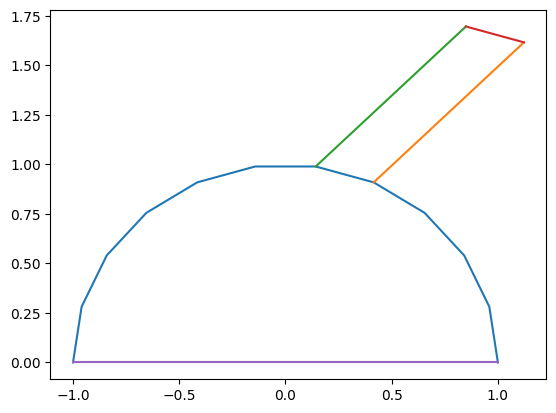

In [25]:
def line_from_points(xs,ys):
    x1,x2 = xs[0][1], xs[1][1]
    y1,y2 = ys[0][1], ys[1][1]
    return (x2,x1), (y2,y1)
    

theta1 = np.pi/3
lx1, ly1 = generate_line(theta1,1, 1)
theta2 = theta1 + np.arcsin(0.5)
lx2, ly2 = generate_line(theta2,1, 1)
lx3, ly3 = line_from_points((lx1,lx2),(ly1,ly2))


plt.plot(x,y)
plt.plot(lx1,ly1)
plt.plot(lx2,ly2)
plt.plot(lx3, ly3)
plt.plot(lx4, ly4)

In [26]:
import scipy as sp

In [27]:
lx, ly = np.array((lx1, lx2)).flatten(), np.array((ly1, ly2)).flatten()

In [28]:
points = []
to_ignore = set()
for i,xi in enumerate(x):
    equals = np.argwhere(np.equal(lx,xi))
    if equals.shape[0] != 0:
        ind = equals[0][0]
        to_ignore.add(ind)
        points.append([xi,ly[ind]])
    else:
        points.append([xi,y[i]])
for i, xi in enumerate(lx):
    if i in to_ignore:
        continue
    points.append([xi,ly[i]])
points

[[1.0, 0.0],
 [0.9594929736144974, 0.28173255684142967],
 [0.8412535328311812, 0.5406408174555976],
 [0.6548607339452851, 0.7557495743542583],
 [0.41541501300188644, 0.9096319953545183],
 [0.14231483827328512, 0.9898214418809327],
 [-0.142314838273285, 0.9898214418809328],
 [-0.4154150130018863, 0.9096319953545184],
 [-0.654860733945285, 0.7557495743542583],
 [-0.8412535328311811, 0.5406408174555978],
 [-0.9594929736144974, 0.28173255684142967],
 [-1.0, 1.2246467991473532e-16],
 [1.122521794188434, 1.616738776541066],
 [0.8494216194598325, 1.6969282230674803]]

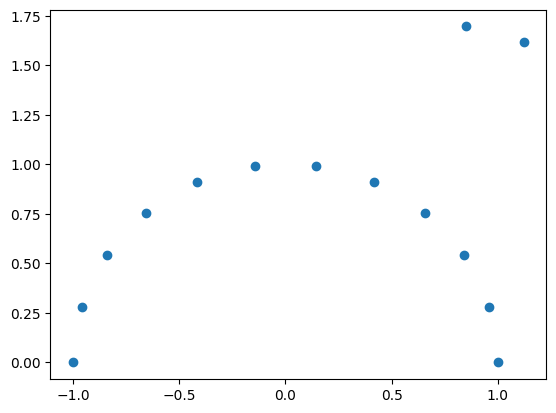

In [33]:
points2= np.array(points)
plt.scatter(points2[:,0],points2[:,1])

In [10]:
import numpy as np
from scipy.spatial import Delaunay

points = np.array(points)



[[1.0, 0.9594929736144974], [0.0, 0.28173255684142967]]


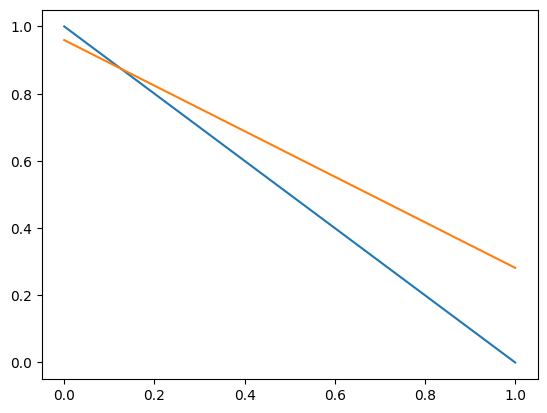

In [11]:
lines = [[[x1,x2],[y1,y2]] for (x1,y1), (x2,y2) in zip(points[:-1],points[1:])]
print(lines[0])
plt.plot(lines[0])

In [12]:
tri = Delaunay(points)
points.shape

(14, 2)

In [22]:
from scipy.spatial import Delaunay, delaunay_plot_2d
import meshio

mesh = meshio.Mesh(points, cells=[("triangle",tri.simplices)])

(<function copyreg._reconstructor(cls, base, state)>,
 (meshio._mesh.Mesh, object, None),
 {'points': array([[ 1.00000000e+00,  0.00000000e+00],
         [ 9.59492974e-01,  2.81732557e-01],
         [ 8.41253533e-01,  5.40640817e-01],
         [ 6.54860734e-01,  7.55749574e-01],
         [ 4.15415013e-01,  9.09631995e-01],
         [ 1.42314838e-01,  9.89821442e-01],
         [-1.42314838e-01,  9.89821442e-01],
         [-4.15415013e-01,  9.09631995e-01],
         [-6.54860734e-01,  7.55749574e-01],
         [-8.41253533e-01,  5.40640817e-01],
         [-9.59492974e-01,  2.81732557e-01],
         [-1.00000000e+00,  1.22464680e-16],
         [ 1.12252179e+00,  1.61673878e+00],
         [ 8.49421619e-01,  1.69692822e+00]]),
  'cells': [<meshio CellBlock, type: triangle, num cells: 18, tags: []>],
  'point_data': {},
  'cell_data': {},
  'field_data': {},
  'point_sets': {},
  'cell_sets': {},
  'gmsh_periodic': None,
  'info': None})

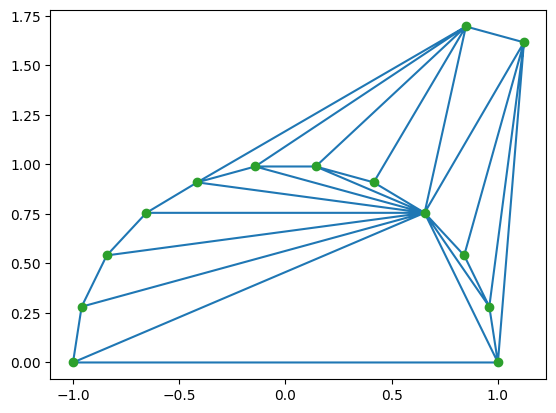

[[-1  1 10]
 [ 0  5 13]
 [ 3  8  7]
 [15  2  4]
 [ 3 -1 17]
 [ 1  6 13]
 [ 5 -1  7]
 [ 6  2  8]
 [ 2 15  7]
 [11 -1 10]
 [ 9  0 13]
 [-1  9 16]
 [14 -1 16]
 [ 1  5 10]
 [-1 12 17]
 [ 8  3 17]
 [12 -1 11]
 [ 4 14 15]]
[[ 1  0 12]
 [ 2  1 12]
 [ 4 13  5]
 [13  6  5]
 [ 7  6 13]
 [ 3  2 12]
 [13  3 12]
 [ 4  3 13]
 [ 3  4  5]
 [ 0  3 11]
 [ 1  3  0]
 [ 3 10 11]
 [ 9  3  8]
 [ 3  1  2]
 [ 3  7  8]
 [ 6  3  5]
 [10  3  9]
 [ 3  6  7]]


In [32]:
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()


In [57]:
import meshlib.mrmeshpy as mr
from meshlib.mrmeshpy import SubdivideSettings
# load raster image:
dm = mr.loadDistanceMapFromImage(mr.Path("Binary_coins.png"), 0)
# find the boundary contour between black and white:

polyline2 = mr.distanceMapTo2DIsoPolyline(dm, isoValue=127)
# compute the triangulation inside the contour
mesh = mr.triangulateContours(polyline2.contours2(None))
# save 2D triangulation in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("Binary_coins.obj"))


sub_set = SubdivideSettings()
sub_set.__setattr__("maxTriAspectRatio",0.25)
sub_set.maxTriAspectRatio
print(sub_set.maxEdgeLen)
# by default split 1000 edges:
mr.subdivideMesh(mesh, sub_set)
# save 2D mesh in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("Binary_coins1.obj"))

0.0


C:\Users\OM-FI\AppData\Local\Temp\ipykernel_46500\495985157.py:4: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  dm = mr.loadDistanceMapFromImage(mr.Path("Binary_coins.png"), 0)
C:\Users\OM-FI\AppData\Local\Temp\ipykernel_46500\495985157.py:11: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("Binary_coins.obj"))
C:\Users\OM-FI\AppData\Local\Temp\ipykernel_46500\495985157.py:21: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("Binary_coins1.obj"))


[[ 1.00000000e+00  0.00000000e+00]
 [ 9.59492974e-01  2.81732557e-01]
 [ 8.41253533e-01  5.40640817e-01]
 [ 6.54860734e-01  7.55749574e-01]
 [ 4.15415013e-01  9.09631995e-01]
 [ 1.42314838e-01  9.89821442e-01]
 [-1.42314838e-01  9.89821442e-01]
 [-4.15415013e-01  9.09631995e-01]
 [-6.54860734e-01  7.55749574e-01]
 [-8.41253533e-01  5.40640817e-01]
 [-9.59492974e-01  2.81732557e-01]
 [-1.00000000e+00  1.22464680e-16]
 [ 1.12252179e+00  1.61673878e+00]
 [ 8.49421619e-01  1.69692822e+00]]


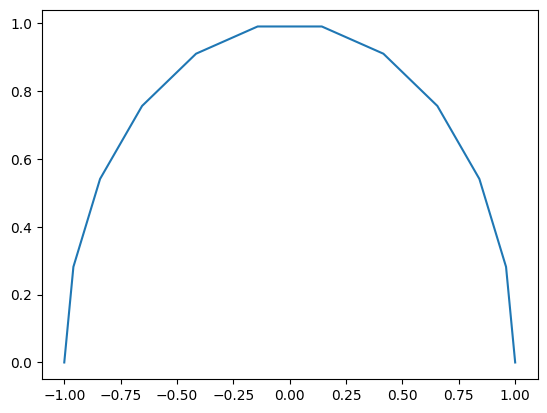

In [71]:
points3 = np.array([[i,j] for i,j in zip(x,y)])
plt.plot(points3[:,0],points3[:,1])
print(points2)

20


C:\Users\OM-FI\AppData\Local\Temp\ipykernel_46500\3357415399.py:11: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("before refining.obj"))
C:\Users\OM-FI\AppData\Local\Temp\ipykernel_46500\3357415399.py:21: DeprecationWarning: mrmeshpy.Path is deprecated, use os.PathLike type instead
  mr.saveMesh(mesh, mr.Path("after refining.obj"))


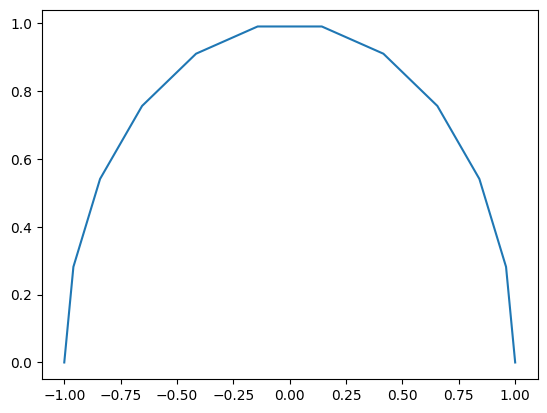

In [73]:
import meshlib.mrmeshpy as mr
from meshlib.mrmeshpy import SubdivideSettings
import meshlib.mrmeshnumpy as mrn


polyline2 = mrn.polyline2FromPoints(points3)
plt.plot(points3[:,0],points3[:,1])
# compute the triangulation inside the contour
mesh = mr.triangulateContours(polyline2.contours2(None))
# save 2D triangulation in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("before refining.obj"))


sub_set = SubdivideSettings()
sub_set.__setattr__("maxEdgeSplits",20)

print(sub_set.maxEdgeSplits)
# by default split 1000 edges:
mr.subdivideMesh(mesh, sub_set)
# save 2D mesh in a textual OBJ file:
mr.saveMesh(mesh, mr.Path("after refining.obj"))